# Week 5-Assignment

## MSDS 600 - Introduction to Data Science

## Data Science Automation

## Professor: Dr. Aiman Gannous

### Prepared By: Danish Kamaal

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

# Load Data

Loading Data and setting Index column as customerID. Updated `TotalCharges_tenure_ratio` Column name to `charge_per_tenure` in `prepped_Churn_data.csv` file to match with column name in `new_churn_data.csv` file to make predictions.

In [1]:
import pandas as pd

df = pd.read_csv('prepped_Churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0,29.850000
5575-GNVDE,34,1,1,1,56.95,1889.50,0,55.573529
3668-QPYBK,2,1,0,1,53.85,108.15,1,54.075000
7795-CFOCW,45,0,1,2,42.30,1840.75,0,40.905556
9237-HQITU,2,1,0,0,70.70,151.65,1,75.825000
...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,1,1,84.80,1990.50,0,82.937500
2234-XADUH,72,1,1,3,103.20,7362.90,0,102.262500
4801-JZAZL,11,0,0,0,29.60,346.45,0,31.495455


# AutoML with PyCaret

Installed pycaret package. It didn't work as expected at first due to higher version of `scikit-learn`. So Installed supported version of `scikit-learn` `0.23.1` as per instruction on PyCaret website. `PyCaret` is used for autoML, it helps in comparing machine learning models.

In [2]:
from pycaret.classification import setup, compare_models, predict_model, save_model, load_model

In [3]:
automl = setup(df, target='Churn', preprocess=False, numeric_features=['Contract', 'PaymentMethod', 'PhoneService'])

,Description,Value
0,session_id,6327
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(7032, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Transformed Train Set,"(4922, 7)"
9,Transformed Test Set,"(2110, 7)"


Updated Data Type of `Contract` , `PaymentMethod` and `PhoneService` to numeric as it was showing as categorial. It helps in xgboost and lightgbm working.

In [4]:
automl[13]

Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False)

Running autoML to find best model.

In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7869,0.8353,0.5125,0.6242,0.5622,0.4233,0.4273,0.6660
ridge,Ridge Classifier,0.7855,0.0000,0.4343,0.6486,0.5196,0.3885,0.4018,0.0120
catboost,CatBoost Classifier,0.7854,0.8356,0.4942,0.6269,0.5507,0.4129,0.4190,1.2790
ada,Ada Boost Classifier,0.7850,0.8341,0.5041,0.6229,0.5554,0.4162,0.4212,0.1360
lda,Linear Discriminant Analysis,0.7846,0.8234,0.4905,0.6244,0.5488,0.4102,0.4157,0.0130
gbc,Gradient Boosting Classifier,0.7820,0.8359,0.4920,0.6175,0.5462,0.4055,0.4108,0.2800
lightgbm,Light Gradient Boosting Machine,0.7810,0.8274,0.5178,0.6081,0.5578,0.4138,0.4171,0.1640
rf,Random Forest Classifier,0.7783,0.8082,0.4935,0.6061,0.5430,0.3990,0.4032,0.4240
xgboost,Extreme Gradient Boosting,0.7769,0.8154,0.4973,0.6007,0.5434,0.3977,0.4012,0.3840
et,Extra Trees Classifier,0.7676,0.7860,0.4943,0.5783,0.5321,0.3789,0.3815,0.3660


In [6]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6327, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Best Model is Logistic Regression.As we are not preprocessing data, best_model object is used to make predictions. Though I also got CatBoost Classifier as well as best model in some runs.

In [7]:
df.iloc[-2:-1].shape

(1, 8)

Indexing [-2:-1] is used to select last row and to make is as 2D.

In [8]:
predict_model(best_model, df.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure,Label,Score
customerID,,,,,,,,,,
8361-LTMKD,4,1,0,1,74.4,306.6,1,76.65,1,0.5663


Above example is of predict_model function which is used when preprocessing is used with autoML. `Label` column has predicted Label which is `1` in this case. As score is >= .5 it rounded it up to `1`.

## Saving and loading our model

Saving trained macine learning model which is CBC as python file to be used later. Pickle module is used to save file as pickle file (Saves Data in Binary format).

In [9]:
save_model(best_model, 'LGR')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Contract',
                                                           'PaymentMethod',
                                                           'PhoneService'],
                                       target='Churn', time_features=[])),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=1000,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_sta

In [10]:
import pickle

with open('LGR_model.pk', 'wb') as k:
    pickle.dump(best_model, k)

`open` function is used to open `CBC_model.pk` file. `w` is for writing the file and `b` is for binary format. `with` is used for automatically closing the file.

In [11]:
with open('LGR_model.pk', 'rb') as k:
    loaded_model = pickle.load(k)

In [12]:
new_data = df.iloc[-2:-1].copy()
new_data.drop('Churn', axis=1, inplace=True)
loaded_model.predict(new_data)

array([1])

Using load_model function from pycaret to load saved model `CBC`. Then using predict_model to get the prediction.

In [13]:
loaded_cbc = load_model('LGR')

Transformation Pipeline and Model Successfully Loaded


In [14]:
predict_model(loaded_cbc, new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,Label,Score
customerID,,,,,,,,,
8361-LTMKD,4,1,0,1,74.4,306.6,76.65,1,0.5663


# Making a Python Module to make predictions

Using machine learning model in a Python file to provide new data as input and get the predictions. I used `VS Code` IDE to create a Python file.

In [15]:
from IPython.display import Code

Code('predict_churn.py')

import pandas as pd
from pycaret.classification import predict_model, load_model

def load_data(filepath):
    """
    Loads Churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    model = load_model('LGR')
    predictions = predict_model(model, data=df)
    predictions.rename({'Label': 'churn_prediction'}, axis=1, inplace=True)
    predictions['churn_prediction'].replace({1: 'Yes', 0: 'No'},
                                            inplace=True)
    return predictions['churn_prediction']


if __name__ == "__main__":
    df = load_data('new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

Running the Python file using magic command `%run`

In [16]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded
predictions:
customerID
9305-CKSKC    Yes
1452-KNGVK     No
6723-OKKJM     No
7832-POPKP     No
6348-TACGU     No
Name: churn_prediction, dtype: object


I was getting some other models as best models in some runs but `Logistic Regression` was the one that came up frequently. Comparing with True Values for `new_churn_data.csv` i.e. [1, 0, 0, 1, 0] we have one false negative. 

`VS Code` Screenshot of Python File

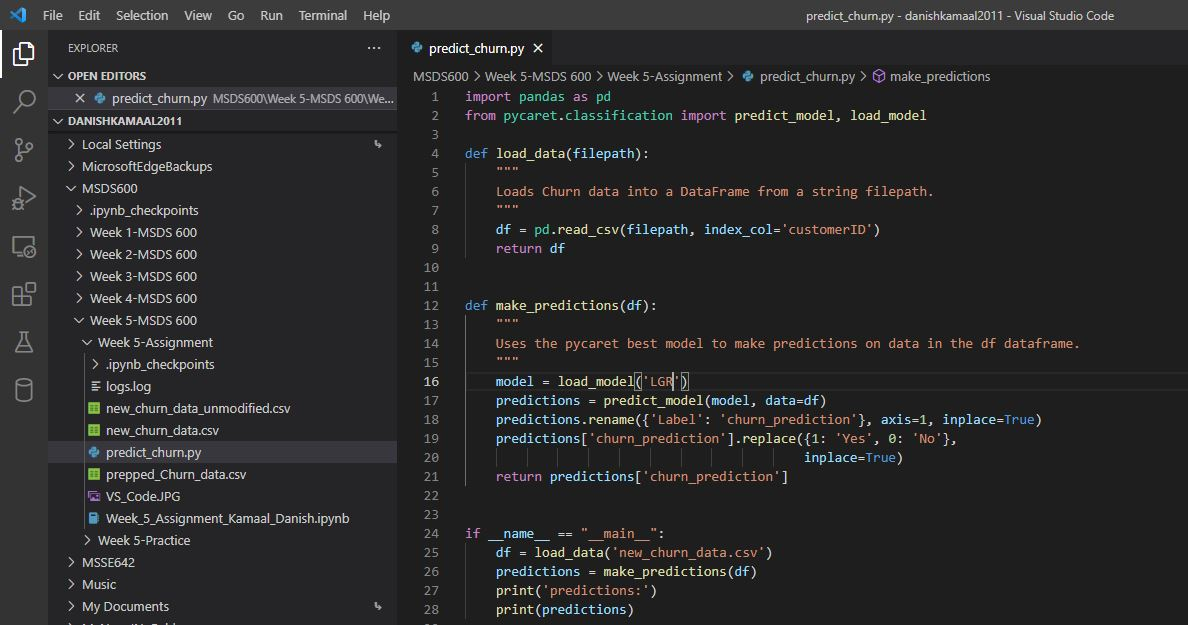


# Saving our code to GitHub

I already had account on GitHub. But as instructed by Professor in (George, 2021) downloaded GUI Desktop application and created respository using it.

# Summary

First updated `TotalCharges_tenure_ratio` Column name to `charge_per_tenure` in `prepped_Churn_data.csv` file to match with column name in `new_churn_data.csv` file to make predictions. Then loaded data from `prepped_Churn_data.csv` file using pandas. Then installed `pycaret` package, also installed compatible `scikit-learn` version that supports `PyCaret`. PyCaret is used for AutoML and compares different machine learning models. Data type of `Contract` , `PaymentMethod` and `PhoneService` was Categorical, so updated it to numeric, also set preprocess to False for getting xgboost and lightgbm working. On comparing models `Logistic Regression` turned out to be best model. 

Next step is to Save and Load the best model. Used pickle module to save data in Binary format, file is saved as pickle file. `load_model` function was used to load saved best model which is `Logistic Regression` to make prediction. `VS Code` IDE was used to create Python file. Loaded `new_churn_data.csv` in to data frame and pycaret best model was used to get prediction. On making prediction, we had one false negative. So basically best moded performed fairly well, though it is not perfect.

Also downloaded GitHub GUI Desktop application as I already had GitHub Account logged in and created repository `MSDS_600_Week5`. [Link to Week 5 Assignment GitHub Repository](https://github.com/dkamaal/MSDS_600_Week5)


# References

Gannous, A. (2022) MSDS 600 - From the Experts: Data Science Automation. World Class. Anderson College of Business & Computing. Regis University.

George, N. (2021) MSDS 600 - From the Experts: Data Science Automation. World Class. Anderson College of Business & Computing. Regis University.

Masood, A. & Sherif, A. (2021) Automated Machine Learning. Packt Publishing. [O’Reilly Version] Retrieved from https://learning.oreilly.com/library/view/automated-machine-learning/9781800567689/